#  Classification Methods

Main Methods Used: Decision Tree, Random Forest Classifier

The random state has been set to 42 where applicable to maintain consistency.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
vidgamesdf = pd.read_csv("vidgames_cleaned.csv")

In [5]:
vidgamesdf.drop(labels="Unnamed: 0", axis="columns", inplace=True)
vidgamesdf

,Name,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,007: Quantum of Solace,2008.0,Action,Activision,1.82,64.563380,71.0,6.653906,128.0,Treyarch,T
1,18 Wheeler: American Pro Trucker,2002.0,Racing,Acclaim Entertainment,0.11,52.000000,17.0,6.800000,8.0,Acclaim Studios Cheltenham,E
2,187: Ride or Die,2005.0,Racing,Ubisoft,0.06,51.000000,40.0,6.900000,8.0,Ubisoft Paris,M
3,2002 FIFA World Cup,2002.0,Sports,Electronic Arts,0.24,78.653846,26.0,8.220000,10.0,EA Sports,E
4,2010 FIFA World Cup South Africa,2010.0,Sports,Electronic Arts,1.73,78.593407,91.0,7.821795,78.0,Electronic Arts,E
...,...,...,...,...,...,...,...,...,...,...,...
4425,de Blob 2,2011.0,Platform,THQ,0.21,74.000000,50.0,7.100000,34.0,Blue Tongue Entertainment,E10+
4426,echochrome,2008.0,Puzzle,Sony Computer Entertainment,0.09,79.000000,28.0,7.700000,13.0,"SCE/WWS, SCE Japan Studio",E
4427,htoL#NiQ: The Firefly Diary,2014.0,Platform,Nippon Ichi Software,0.01,58.000000,16.0,7.700000,23.0,Nippon Ichi Software,T
4428,nail'd,2010.0,Racing,Deep Silver,0.12,66.000000,36.0,6.200000,13.0,Techland,E10+


We are trying to predict GlobalSales using Classification models. Through a classification model, we will be able to see which factors are the most important in making a video game with high sales, although we will not be able to give a exact number of projected sales.

In [6]:
vidgamesdf.describe()

,Year_of_Release,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000
mean,2006.799549,0.430580,68.818975,28.117156,7.354293,39.668397
std,4.080750,0.452122,12.130409,17.072807,1.170144,44.805059
min,1985.000000,0.010000,35.000000,4.000000,3.900000,4.000000
25%,2004.000000,0.110000,61.000000,15.000000,6.600000,10.000000
50%,2006.000000,0.260000,70.000000,25.000000,7.600000,22.000000
75%,2009.000000,0.580000,78.000000,38.000000,8.221304,50.000000
max,2016.000000,2.120000,98.000000,91.000000,9.600000,229.000000


We are trying to see what makes a game sell well. For this reason, we will take the top 25% of games as a 'hit' and encoded as '1', and the rest will be 'misses', encoded as '0'.

In [7]:
# create a 'hit' game column
vidgamesdf['Hit'] = np.nan

# 0.58 is the 75% percentile of GlobalSales
for i in range(len(vidgamesdf)):
    hit = (vidgamesdf['Global_Sales'][i] >= 0.58)
    
    if hit:
        vidgamesdf['Hit'][i] = 1
    else:
        vidgamesdf['Hit'][i] = 0

C:\Users\Gan\AppData\Local\Temp\ipykernel_13392\1565426666.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vidgamesdf['Hit'][i] = 1
C:\Users\Gan\AppData\Local\Temp\ipykernel_13392\1565426666.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vidgamesdf['Hit'][i] = 0


In [8]:
vidgamesdf.describe()

,Year_of_Release,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Hit
count,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000
mean,2006.799549,0.430580,68.818975,28.117156,7.354293,39.668397,0.253499
std,4.080750,0.452122,12.130409,17.072807,1.170144,44.805059,0.435063
min,1985.000000,0.010000,35.000000,4.000000,3.900000,4.000000,0.000000
25%,2004.000000,0.110000,61.000000,15.000000,6.600000,10.000000,0.000000
50%,2006.000000,0.260000,70.000000,25.000000,7.600000,22.000000,0.000000
75%,2009.000000,0.580000,78.000000,38.000000,8.221304,50.000000,1.000000
max,2016.000000,2.120000,98.000000,91.000000,9.600000,229.000000,1.000000


In [9]:
#Convert categorical variables to int using one hot encoding, as used in regression
genre_int = pd.get_dummies(vidgamesdf["Genre"], drop_first=True)
rating_int = pd.get_dummies(vidgamesdf["Rating"], drop_first=True)
publisher_int = pd.get_dummies(vidgamesdf["Publisher"], drop_first=True)
dev_int=pd.get_dummies(vidgamesdf["Developer"], drop_first=True)

We will use the same One Hot Encoding as used in Regression models to convert the categorical variables

In [10]:
#Set the response and predictor variables 
predictor = vidgamesdf[["Critic_Score", "Year_of_Release", "User_Score", "Critic_Count", "User_Count"]].copy()
predictor = pd.concat([predictor, genre_int, rating_int, publisher_int, dev_int], axis=1)
response = vidgamesdf['Hit']

In [11]:
#Create the train test split for all the models
X_train, X_test, y_train, y_test = train_test_split(predictor, response, test_size = 0.2, random_state = 42)

This train test split will be used for all the following classification models

# Method 1: K Nearest Neighbours

From the scatterplot in our EDA, we realised that the data does not necessarily follow a linear trend, but that it is scattered around. Hence, it may be useful to use a clustering based classifier model to predict whether a game is a "hit".

Hence, we will be using K Nearest Neighbours.

In [78]:
from sklearn.neighbors import KNeighborsClassifier

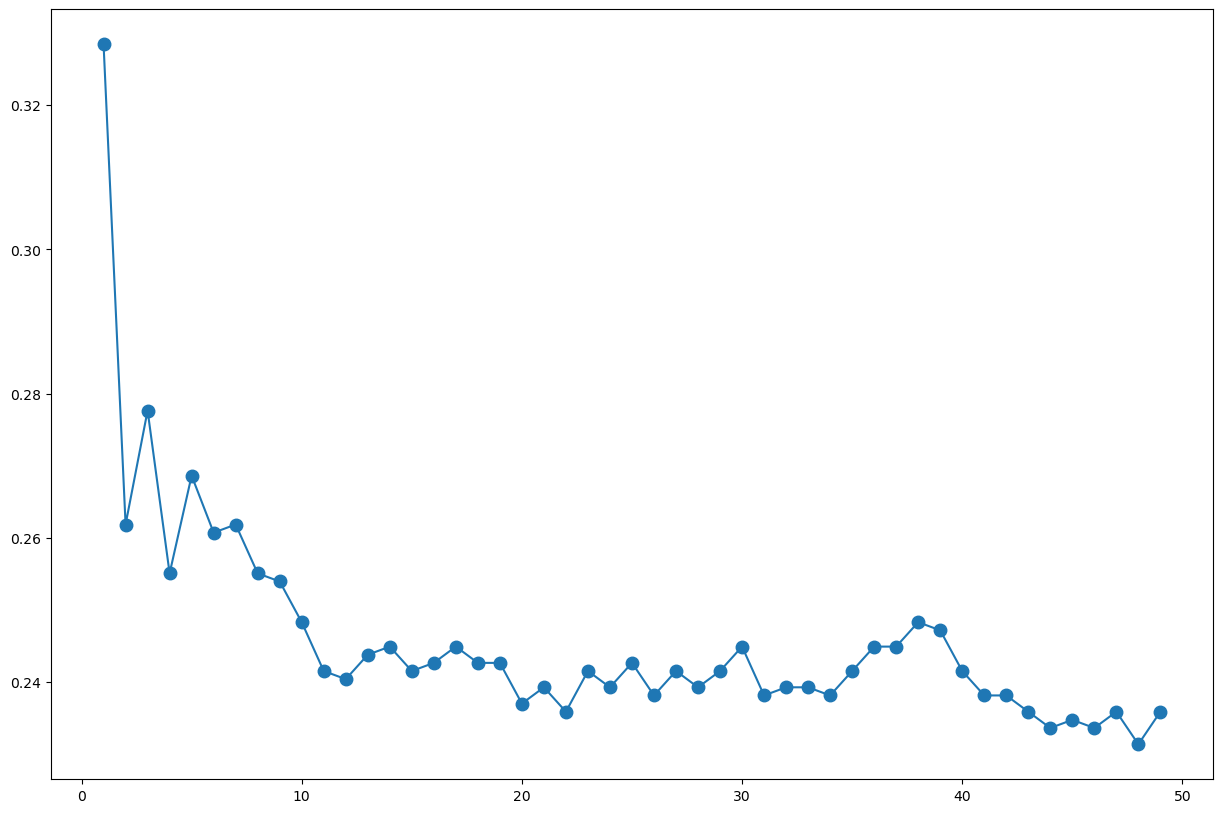

In [107]:
# import warnings filter
from warnings import simplefilter
# stop warning spam
simplefilter(action='ignore', category=FutureWarning)

error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)


K Nearest Neighbours check a point against its neighbours, before collecting a vote on whether it is a 'hit' or not in our case. Hence to find the optimal value of k or number of neighbours to check, we try k values 1 to 50. Since the graph fluctuates, we will pick a low k value of 12, right before the graph starts fluctuating. 

In [109]:
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print("Test Data Classification Accuracy: \t", knn.score(X_train, y_train))
print()
print("Test Data Classification Accuracy: \t", knn.score(X_test, y_test))

Test Data Classification Accuracy: 	 0.784706546275395

Test Data Classification Accuracy: 	 0.7595936794582393


<AxesSubplot:>

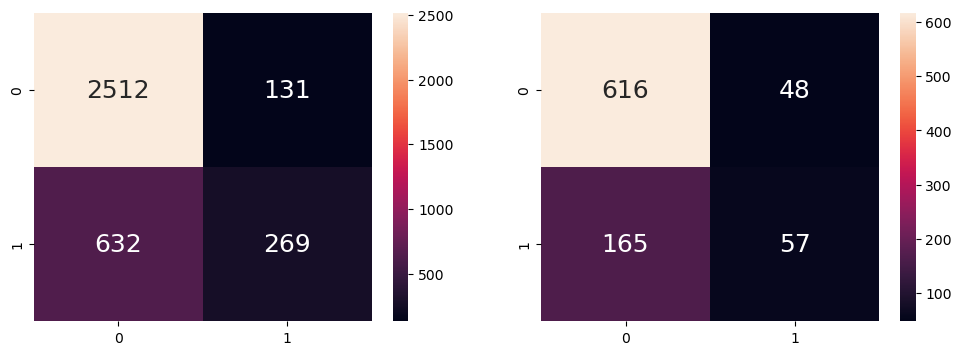

In [110]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

We see that while the classification accuracy is high at 0.76, and that there are significantly more false negatives than false positives. However, the low train accuracy and high false negatives shows that it may not be the best model. We will attempt to improve on this classifcation accuracy.

# Model 2: Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [13]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(random_state = 42)
# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Classification accuracy on train
print("Train Data Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Classification accuracy on test
print("Test Data Classification Accuracy \t:", dectree.score(X_test, y_test))
print()


Train Data Classification Accuracy 	: 1.0

Test Data Classification Accuracy 	: 0.7573363431151241



<AxesSubplot:>

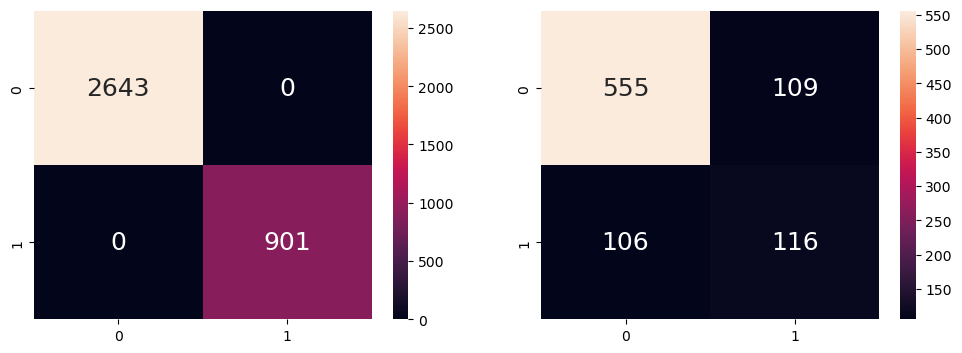

In [14]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

The classification accuracy is quite high, with a similar number of false positives and negatives.

In [15]:
print("Depth of Decision Tree:", dectree.get_depth())

Depth of Decision Tree: 96


However, the tree is very large at depth 96 due to the amount of categorical variables converted via One Hot Encoding, so we will analyse the most important features instead.

In [16]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(dectree.feature_importances_, 3)})
importances = importances.sort_values('importance',ascending=False).reset_index(drop=True)

In [17]:
importances

,feature,importance
0,User_Count,0.190
1,Critic_Score,0.105
2,Critic_Count,0.102
3,Year_of_Release,0.093
4,User_Score,0.083
...,...,...
1324,Evolution Studios,0.000
1325,Human Entertainment,0.000
1326,Examu,0.000
1327,"Examu, Marvelous Inc.",0.000


As seen above, out of 1329 features, UserCount has the highest importance, followed by critic count. This is similar to the importances in the Linear Regression models. However, the classification method has allowed for more variables to be of higher importance, allowing for the prediction accuracy to be higher. How can we further refine and improve our accuracy?

# Method 3: Random Forest Classification

While the classification accuracy of the decision tree was high, when the tree was allowed to grow to its maximum depth, it reached a depth of 96. Such a deep tree with so many leaves is prone to overfitting, and it indicates that many features are important in classification of a "hit" (top 25%) game. 

While we could have solved this by limiting the max depth of the decision tree, the large amount of features at 1329 might not be accurately represented.

A way to solve both problems would be to use Random Forest Classification.

The random forest creates many decision trees, resulting in a "forest". It then averages the predictions of each component tree to make a prediction. It naturally follows the decision tree, and is likely to improve classification accuracy when the tree is deep.

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
randomforest = RandomForestClassifier(random_state = 42)
randomforest.fit(X_train, y_train)

y_train_pred = randomforest.predict(X_train)
y_test_pred = randomforest.predict(X_test)

print("Test Data Classification Accuracy: \t", randomforest.score(X_train, y_train))
print()
print("Test Data Classification Accuracy: \t", randomforest.score(X_test, y_test))

Test Data Classification Accuracy: 	 1.0

Test Data Classification Accuracy: 	 0.8081264108352144


<AxesSubplot:>

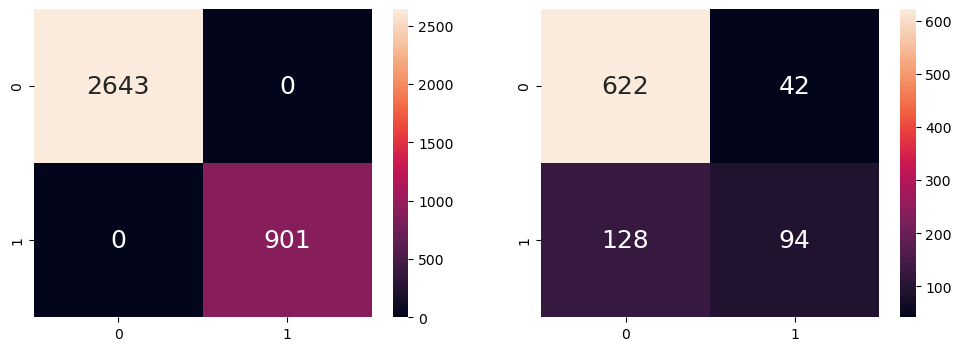

In [71]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Random Forest has significantly improved prediction accuracy by around 0.06. Notably, while the overall accuracy is higher,  false positives have decreased significantly, and false negatives have increased slightly. It has decreased the false negatives from K nearest neighbours, and has improved on the decision tree. Hence, the random forest classifier is the best model for our dataset.